In [2]:
#importing libraries
import numpy as np 

%matplotlib inline 
#to use as command line calls #using inline graphs will come next to code

import matplotlib.pyplot as plt #for graphs
import os #for operating system dependent fucntionality
from keras import layers #for neural network layers
from keras.models import Model
from keras.models import load_model
from keras import callbacks #for training logs, saving to disk periodically
import cv2 #OpenCV(Open Source computer vision lib), containg CV algos
import string

2025-10-27 02:44:47.362342: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-27 02:44:47.401113: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-27 02:44:49.743776: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
!pip install matplotlib
!pip install keras
!pip install opencv-python
!pip install --upgrade pip
!pip install tensorflow

In [3]:
#print images in dataset
!ls
data_dir = f"{os.getcwd()}/samples"
os.listdir(data_dir)[:10]

automatic_downloader.py			 intelligence	       models
bootstraper.py				 main.py	       README.md
Captcha_Recognition_Project_Final.ipynb  manual_imd_downloads  samples
captchas				 ml_data_3188.csv      urls
dataHandlers				 ml_test_3188.csv


['wm5pcn_9103.jpg',
 'b2fdxy_1064.jpg',
 'mbb5p4_3054.jpg',
 'fpx2nw_3027.jpg',
 '4cbge2_3315.jpg',
 'e476p8_4662.jpg',
 'n8n2n3_2982.jpg',
 '5x65yf_1548.jpg',
 '52wnnf_1495.jpg',
 '8bxpew_3436.jpg']

In [5]:
#total no of images in dataset
n=len(os.listdir(data_dir))
n

10001

In [6]:
#defining size of image
imgshape=(50,200,1) #50-height, 200-width, 1-no of channels

In [7]:
character= string.ascii_lowercase + "0123456789" # All symbols captcha can contain
nchar = len(character) #total number of char possible
nchar

36

In [15]:
#preprocesss image
def preprocess():
  X = np.zeros((n,50,200,1)) #1070*50*200 array with all entries 0
  y = np.zeros((6,n,nchar)) #6*1070*36(5 letters in captcha) with all entries 0

  for i, pic in enumerate(os.listdir(data_dir)):
  #i represents index no. of image in directory 
  #pic contains the file name of the particular image to be preprocessed at a time
    
    img = cv2.imread(os.path.join(data_dir, pic), cv2.IMREAD_GRAYSCALE) #Read image in grayscale format
    # print(img.shape)
    pic_target = pic[:6]#this drops the .png extension from file name and contains only the captcha for training
    
    if len(pic_target) <= 7: #captcha is not more than 5 letters
      img = img / 255.0 #scales the image between 0 and 1
      img = np.reshape(img, (50, 200, 1)) #reshapes image to width 200 , height 50 ,channel 1 

      target=np.zeros((6,nchar)) #creates an array of size 5*36 with all entries 0

      for j, k in enumerate(pic_target):
      #j iterates from 0 to 4(5 letters in captcha)
      #k denotes the letter in captcha which is to be scanned
         index = character.find(k) #index stores the position of letter k of captcha in the character string
         target[j, index] = 1 #replaces 0 with 1 in the target array at the position of the letter in captcha

      X[i] = img #stores all the images
      y[:,i] = target #stores all the info about the letters in captcha of all images

  return X,y

In [43]:
def createmodel():
    img = layers.Input(shape=imgshape)
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(img)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)

    outs = []
    for _ in range(6):
        d = layers.Dense(64, activation='relu')(x)
        out = layers.Dense(nchar, activation='softmax')(d)
        outs.append(out)
    
    model = Model(img, outs)
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'] * 6
    )
    return model


In [44]:
#Create model
model=createmodel();
model.summary();

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 50, 200,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 50, 200,   │        320 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 25, 100,   │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 25, 100,   │     18,496 │ max_pooling2d_9[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 12, 50,    │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 12, 50,    │     73,856 │ max_pooling2d_10… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 6, 25,     │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 6, 25,     │        512 │ max_pooling2d_11… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 19200)     │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 19200)     │          0 │ flatten_3[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 64)        │  1,228,864 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 64)        │  1,228,864 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 64)        │  1,228,864 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 64)        │  1,228,864 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_44 (Dense)    │ (None, 64)        │  1,228,864 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_46 (Dense)    │ (None, 64)        │  1,228,864 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 36)        │      2,340 │ dense_36[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 36)        │      2,340 │ dense_38[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 36)        │      2,340 │ dense_40[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 36)        │      2,340 │ dense_42[0][0]    │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 7,480,408 (28.54 MB)

 Trainable params: 7,480,152 (28.53 MB)

 Non-trainable params: 256 (1.00 KB)

In [45]:
X,y=preprocess()

In [46]:
#split the 1070 samples where 970 samples will be used for training purpose
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]
print(X_train.shape, y_train.shape)

(970, 50, 200, 1) (6, 970, 36)


In [48]:
y_list = [np.array(y_train[i]) for i in range(6)]
hist = model.fit(
    X_train, 
    y_list, 
    batch_size=32, 
    epochs=30, 
    validation_split=0.2
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - dense_37_accuracy: 1.0000 - dense_37_loss: 0.0032 - dense_39_accuracy: 1.0000 - dense_39_loss: 0.0033 - dense_41_accuracy: 0.9987 - dense_41_loss: 0.0060 - dense_43_accuracy: 1.0000 - dense_43_loss: 0.0039 - dense_45_accuracy: 0.9987 - dense_45_loss: 0.0086 - dense_47_accuracy: 1.0000 - dense_47_loss: 0.0023 - loss: 0.0273 - val_dense_37_accuracy: 0.7113 - val_dense_37_loss: 1.1501 - val_dense_39_accuracy: 0.7113 - val_dense_39_loss: 1.3158 - val_dense_41_accuracy: 0.7887 - val_dense_41_loss: 1.3836 - val_dense_43_accuracy: 0.7113 - val_dense_43_loss: 0.9790 - val_dense_45_accuracy: 0.7526 - val_dense_45_loss: 1.0549 - val_dense_47_accuracy: 0.8299 - val_dense_47_loss: 0.5783 - val_loss: 6.1682
Epoch 2/30
16/25 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - dense_37_accuracy: 1.0000 - dense_37_loss: 0.0052 - dense_39_accuracy: 0.9970 - dense_39_loss: 0.0090 - dense_41_accuracy: 1.0000 - dense_41_loss: 0.0054 - dense_43_accuracy: 0.9954 - dens

KeyboardInterrupt: 

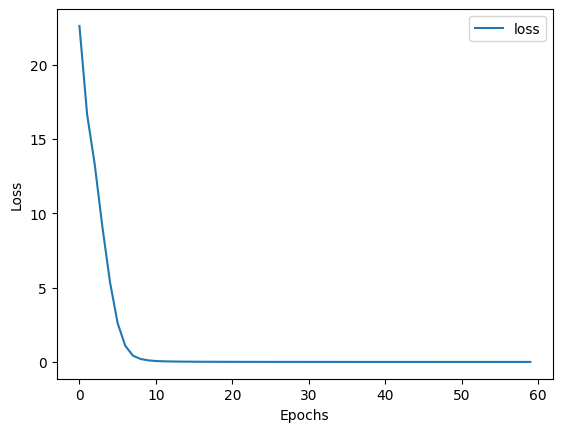

In [49]:
#graph of loss vs epochs
for label in ["loss"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
#graph of accuracy of dense_2 vs epochs
for label in ["val_dense_2_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 2 layer")
plt.show()

KeyError: 'val_dense_2_accuracy'

In [ ]:
#graph of accuracy of dense_4 vs epochs
for label in ["val_dense_4_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 4 layer")
plt.show()

KeyError: 'val_dense_4_accuracy'

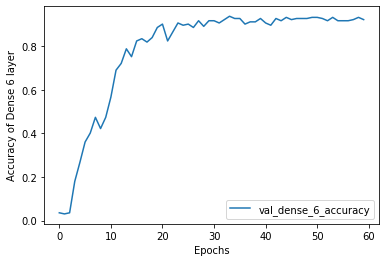

In [ ]:
#graph of accuracy of dense_6 vs epochs
for label in ["val_dense_6_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 6 layer")
plt.show()

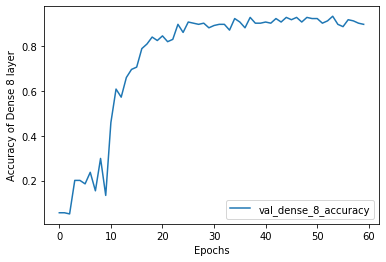

In [ ]:
#graph of accuracy of dense_8 vs epochs
for label in ["val_dense_8_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 8 layer")
plt.show()

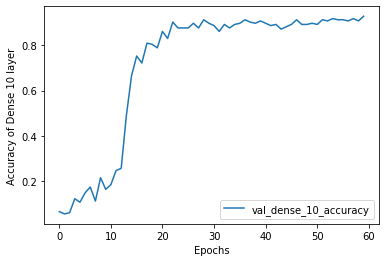

In [ ]:
#graph of accuracy of dense_10 vs epochs
for label in ["val_dense_10_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 10 layer")
plt.show()

In [50]:
#Loss on training set
#Finding Loss on training set
preds = model.evaluate(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4], y_train[5]])
print ("Loss on training set= " + str(preds[0]))

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - dense_37_accuracy: 0.9381 - dense_37_loss: 0.2466 - dense_39_accuracy: 0.9485 - dense_39_loss: 0.2612 - dense_41_accuracy: 0.9515 - dense_41_loss: 0.2372 - dense_43_accuracy: 0.9381 - dense_43_loss: 0.2409 - dense_45_accuracy: 0.9474 - dense_45_loss: 0.3073 - dense_47_accuracy: 0.9536 - dense_47_loss: 0.1822 - loss: 1.2991
Loss on training set= 1.2990682125091553


In [51]:
#Finding loss on test set
preds = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4] , y_test[5]])
print ("Loss on testing set= " + str(preds[0]))

283/283 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - dense_37_accuracy: 0.6798 - dense_37_loss: 1.3290 - dense_39_accuracy: 0.6932 - dense_39_loss: 1.2289 - dense_41_accuracy: 0.7277 - dense_41_loss: 1.0133 - dense_43_accuracy: 0.7412 - dense_43_loss: 1.0135 - dense_45_accuracy: 0.7263 - dense_45_loss: 1.2849 - dense_47_accuracy: 0.7562 - dense_47_loss: 0.9763 - loss: 6.8456
Loss on testing set= 6.845637798309326


In [52]:
#to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    if img is not None: #image foud at file path
        img = img / 255.0 #Scale image
    else:
        print("Not detected");

    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis])) #np.newaxis=1 
    #added this bcoz x_train 970*50*200*1
    #returns array of size 1*5*36 
    result = np.reshape(res, (6, 36)) #reshape the array
    k_ind = []
    probs = []
    for i in result:
        k_ind.append(np.argmax(i)) #adds the index of the char found in captcha

    capt = '' #string to store predicted captcha
    for k in k_ind:
        capt += character[k] #finds the char corresponding to the index
    return capt 

/home/kripaludas/Documents/Build_For_Bharat/samples
[[192 192 192 ... 251 251 251]
 [192 192 192 ... 251 251 251]
 [192 192 192 ... 251 251 251]
 ...
 [195 195 195 ... 254 254 254]
 [195 195 195 ... 254 254 254]
 [195 195 195 ... 254 254 254]]


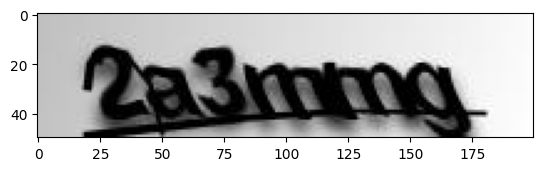

In [4]:
#Check model on samples
print(data_dir)
img=cv2.imread(f'{data_dir}/2a3mmg_5972.jpg',cv2.IMREAD_GRAYSCALE)
print(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [54]:
print("Predicted Captcha =",predict(f'{data_dir}/2a3mmg_5972.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted Captcha = bdbmmg


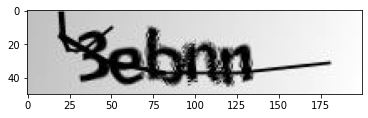

In [ ]:
#Sample 2
img=cv2.imread('/content/drive/My Drive/34d.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
from paddleocr import PaddleOCR

ocr = PaddleOCR(use_angle_cls=True, lang='en')  # lightweight English model
result = ocr.ocr(img, cls=True)

for line in result[0]:
    text = line[1][0]
    confidence = line[1][1]
    print(f"{text} (conf={confidence:.2f})")


/home/kripaludas/Documents/Build_For_Bharat/.bharat/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 